# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.016176e+01     8.860019e+00
 * time: 0.003940105438232422
     1     2.995014e+01     6.259072e+00
 * time: 0.011630058288574219
     2     1.715566e+01     3.624603e+00
 * time: 0.033820152282714844
     3     1.299890e+01     1.942137e+00
 * time: 0.0523531436920166
     4     1.165996e+01     1.743713e+00
 * time: 0.0707850456237793
     5     1.089321e+01     1.321718e+00
 * time: 0.0857992172241211
     6     1.040356e+01     1.681758e+00
 * time: 0.10106801986694336
     7     9.956123e+00     9.065255e-01
 * time: 0.11606621742248535
     8     9.690730e+00     9.743274e-01
 * time: 0.13122200965881348
     9     9.485519e+00     6.040210e-01
 * time: 0.14644217491149902
    10     9.467368e+00     1.012838e+00
 * time: 0.15758800506591797
    11     9.370074e+00     8.967360e-01
 * time: 0.16867399215698242
    12     9.275845e+00     7.859648e-01
 * time: 0.17979717254638672
    13     9.159709e+00     7.644779e-01
 * time:

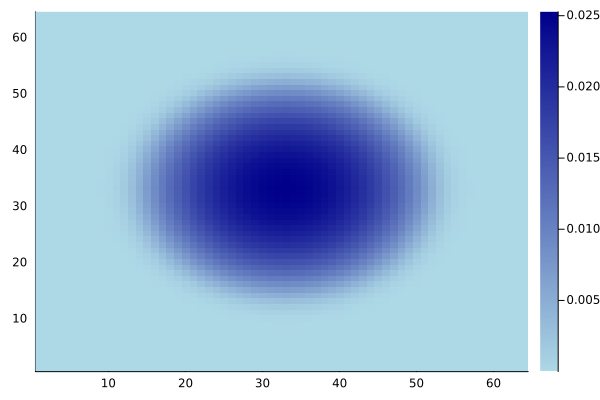

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)